In [2]:
import pandas as pd
import numpy as np

## Question 1

### 1.1.

In [3]:
# import data
spy = pd.read_csv('SPY.csv')
spy.shape

(1259, 16)

In [4]:
# add a new column "True Label", assign "+" if "Return" >= 0, assign "-" if "Return" < 0
spy["True_Label"] = np.where(spy["Return"] >= 0, "+", "-")
spy.head()

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,True_Label
0,2016-01-04,2016,1,4,Monday,1,2016-01,200.49,201.03,198.59,201.02,222353500.0,182.51,0.000000,182.510,182.510,+
1,2016-01-05,2016,1,5,Tuesday,1,2016-01,201.40,201.90,200.05,201.36,110845800.0,182.82,0.001691,182.665,182.665,+
2,2016-01-06,2016,1,6,Wednesday,1,2016-01,198.34,200.06,197.60,198.82,152112600.0,180.52,-0.012614,181.950,181.950,-
3,2016-01-07,2016,1,7,Thursday,1,2016-01,195.33,197.44,193.59,194.05,213436100.0,176.19,-0.023991,180.510,180.510,-
4,2016-01-08,2016,1,8,Friday,1,2016-01,195.19,195.85,191.58,191.92,209817200.0,174.25,-0.010977,179.258,179.258,-


### 1.2.

In [5]:
# seperate training data
L = spy[0:750]
L.shape

(750, 17)

In [7]:
L_up = L.loc[L["True_Label"] == "+"]
L_up.shape

(415, 17)

In [8]:
L_down = L.loc[L["True_Label"] == "-"]
L_down.shape

(335, 17)

In [9]:
# compute default probability that the next day is a "up" day
default_p = 415/(750)
default_p

0.5533333333333333

The default probability that the next day is a "up" day is 0.53333

### 1.3.

In [10]:
from scipy import stats

First, all the days are independent, so 

$P("+" \text{in day 4 |} "-" \text{in last three days}) = P("+") \approx \hat{p} = 0.53333$

$P("-" \text{in day 4 |} "-" \text{in last three days}) = P("-") \approx 1-\hat{p} = 1-0.53333= 0.4666667$

Now, if we want to calculate the probability of seeing k's "-" before "+", it is equal to 

$P(\text{k's "-" before "+"}) \approx (1-\hat{p})^{k}\hat{p}$

the probability of seeing (k+1) "-" is equal to 

$P(\text{(k+1)'s "-"}) \approx (1-\hat{p})^{k+1}$

In [17]:
phat = 0.5533333333333333

In [25]:
for k in range(1,4):
    print("When k = %d, the probability of %d's '-' before '+' is %.4f" % (k,k,((1-phat)**k)*phat))

When k = 1, the probability of 1's '-' before '+' is 0.2472
When k = 2, the probability of 2's '-' before '+' is 0.1104
When k = 3, the probability of 3's '-' before '+' is 0.0493


In [28]:
for k in range(1,4):
    print("When k = %d, the probability of (%d+1)'s '-' is %.4f" % (k,k,(1-phat)**(k+1)))

When k = 1, the probability of (1+1)'s '-' is 0.1995
When k = 2, the probability of (2+1)'s '-' is 0.0891
When k = 3, the probability of (3+1)'s '-' is 0.0398


### 1.4.

First, all the days are independent, so 

$P("+" \text{in day 4 |} "+" \text{in last three days}) = P("+") \approx \hat{p} = 0.53333$

$P("-" \text{in day 4 |} "+" \text{in last three days}) = P("-") \approx 1-\hat{p} = 1-0.53333= 0.4666667$

Now, if we want to calculate the probability of seeing k's "+" before "-", it is equal to 

$P(\text{k's "+" before "-"}) \approx \hat{p}^{k}(1-\hat{p})$

the probability of seeing (k+1) "+" is equal to 

$P(\text{(k+1)'s "+"}) \approx \hat{p}^{k+1}$

In [32]:
for k in range(1,4):
    print("When k = %d, the probability of (%d+1)'s '+' is %.4f" % (k,k,phat**(k+1)))

When k = 1, the probability of (1+1)'s '+' is 0.3062
When k = 2, the probability of (2+1)'s '+' is 0.1694
When k = 3, the probability of (3+1)'s '+' is 0.0937


In [31]:
for k in range(1,4):
    print("When k = %d, the probability of %d's '+' before '-' is %.4f" % (k,k,(phat**k)*(1-phat)))

When k = 1, the probability of 1's '+' before '-' is 0.2472
When k = 2, the probability of 2's '+' before '-' is 0.1368
When k = 3, the probability of 3's '+' before '-' is 0.0757


## Question 2

In [63]:
L.tail()

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,True_Label
745,2018-12-18,2018,12,18,Tuesday,50,2018-50,257.20,257.95,253.28,255.08,134515100.0,244.32,-0.001097,255.680000,259.9628,-
746,2018-12-19,2018,12,19,Wednesday,50,2018-50,255.17,259.40,249.35,251.26,214992800.0,240.66,-0.014976,254.084286,259.2624,-
747,2018-12-20,2018,12,20,Thursday,50,2018-50,249.86,251.62,244.65,247.17,252053400.0,236.75,-0.016278,252.250000,258.4918,-
748,2018-12-21,2018,12,21,Friday,50,2018-50,246.74,249.71,239.98,240.70,255345600.0,231.90,-0.020490,249.955000,257.7986,-
749,2018-12-24,2018,12,24,Monday,51,2018-51,239.04,240.84,234.27,234.34,147311600.0,225.77,-0.026423,246.972857,257.1002,-


### 2.1.

First, we write a function to predict the label for SPY

In [169]:
def spy_predict(d,W, default_p = 0.5533):
    s = ','.join(spy['True_Label'][750-W+d-1:750+d-1])
    s_minus = s+',-'
    s_plus = s+',+'
    N_minus = sum([','.join(spy['True_Label'][(x-(W+1)):x]) == s_minus for x in range(W+1,750+d)])
    N_plus = sum([','.join(spy['True_Label'][(x-(W+1)):x]) == s_plus for x in range(W+1,750+d)])
    if (N_plus == 0 and N_minus == 0):
        return(default_p)
    elif N_plus >= N_minus:
        return('+')
    else:
        return('-')

In [176]:
predict_W2 = [spy_predict(d, W = 2) for d in range(1,501)]
predict_W3 = [spy_predict(d, W = 3) for d in range(1,501)]
predict_W4 = [spy_predict(d, W = 4) for d in range(1,501)]

We could generalize the function to accept all stock data. 

In [212]:
def stock_predict(d, W, default_p, stock, m):
    """
    m is the number of days in training data
    """
    s = ','.join(stock['True_Label'][m-W+d-1:m+d-1])
    s_minus = s+',-'
    s_plus = s+',+'
    N_minus = sum([','.join(stock['True_Label'][(x-(W+1)):x]) == s_minus for x in range(W+1,m+d)])
    N_plus = sum([','.join(stock['True_Label'][(x-(W+1)):x]) == s_plus for x in range(W+1,m+d)])
    if (N_plus == 0 and N_minus == 0):
        return(default_p)
    elif N_plus >= N_minus:
        return('+')
    else:
        return('-')

In [308]:
spy_predict_W2 = [stock_predict(d, W = 2, default_p = 0.5533, stock = spy, m = 750) for d in range(1,510)]
spy_predict_W3 = [stock_predict(d, W = 3, default_p = 0.5533, stock = spy, m = 750) for d in range(1,510)]
spy_predict_W4 = [stock_predict(d, W = 4, default_p = 0.5533, stock = spy, m = 750) for d in range(1,510)]

Next, we are going to do the same on the selected stock, SPOT. 

In [194]:
SPOT = pd.read_csv("SPOT.csv")
SPOT.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-24,159.000000,159.259995,153.520004,155.070007,155.070007,1180400
1,2018-04-25,153.949997,154.600006,150.059006,153.330002,153.330002,1884600
2,2018-04-26,153.000000,157.800003,151.320007,156.600006,156.600006,1277200
3,2018-04-27,157.369995,160.000000,157.000000,159.979996,159.979996,1737800
4,2018-04-30,161.509995,162.880005,159.699997,161.669998,161.669998,3638400


In [198]:
SPOT["True_Label"] = np.where(SPOT.Close-SPOT.Open >= 0 , "+", "-")

In [199]:
SPOT.head()

,Date,Open,High,Low,Close,Adj Close,Volume,True_Label
0,2018-04-24,159.000000,159.259995,153.520004,155.070007,155.070007,1180400,-
1,2018-04-25,153.949997,154.600006,150.059006,153.330002,153.330002,1884600,-
2,2018-04-26,153.000000,157.800003,151.320007,156.600006,156.600006,1277200,+
3,2018-04-27,157.369995,160.000000,157.000000,159.979996,159.979996,1737800,+
4,2018-04-30,161.509995,162.880005,159.699997,161.669998,161.669998,3638400,+


In [200]:
SPOT.shape

(693, 8)

There are 693 days in SPOT data. Therefore, I use first 400 days as training data and last 293 days test data. The default probability is 

In [213]:
SPOT_default_p = np.mean(SPOT[:400]['True_Label'] == "+")
SPOT_default_p

0.5075

The predicted labels on the test data for SPOT are given below

In [ ]:
spot_predict_W2 = [stock_predict(d, W = 2, default_p = SPOT_default_p, stock = SPOT, m = 400) for d in range(1,294)]
spot_predict_W3 = [stock_predict(d, W = 3, default_p = SPOT_default_p, stock = SPOT, m = 400) for d in range(1,294)]
spot_predict_W4 = [stock_predict(d, W = 4, default_p = SPOT_default_p, stock = SPOT, m = 400) for d in range(1,294)]

### 2.2.

In [341]:
spy_acc_W2 = np.mean(np.array(spy_predict_W2) == np.array(spy['True_Label'][750:1259]))
spy_acc_W3 = np.mean(np.array(spy_predict_W3) == np.array(spy['True_Label'][750:1259]))
spy_acc_W4 = np.mean(np.array(spy_predict_W4) == np.array(spy['True_Label'][750:1259]))

In [342]:
print("The accuracy when W = %d is %.4f" % (2,spy_acc_W2))
print("The accuracy when W = %d is %.4f" % (3,spy_acc_W3))
print("The accuracy when W = %d is %.4f" % (4,spy_acc_W4))

The accuracy when W = 2 is 0.5874
The accuracy when W = 3 is 0.5874
The accuracy when W = 4 is 0.5697


In [343]:
spot_acc_W2 = np.mean(np.array(spot_predict_W2) == np.array(SPOT['True_Label'][400:693]))
spot_acc_W3 = np.mean(np.array(spot_predict_W3) == np.array(SPOT['True_Label'][400:693]))
spot_acc_W4 = np.mean(np.array(spot_predict_W4) == np.array(SPOT['True_Label'][400:693]))

In [344]:
print("The accuracy when W = %d is %.4f" % (2,spot_acc_W2))
print("The accuracy when W = %d is %.4f" % (3,spot_acc_W3))
print("The accuracy when W = %d is %.4f" % (4,spot_acc_W4))

The accuracy when W = 2 is 0.5392
The accuracy when W = 3 is 0.5188
The accuracy when W = 4 is 0.5290


### 2.3.

For the stock SPOT, W = 2 gave the highest accuracy. For the stock SPY, W = 2 or W = 3 gave the highest accuracy. 

## Question 3

### 3.1.

In [375]:
spy_plus_total = (np.array(spy_predict_W2) == "+")*1 +\
                 (np.array(spy_predict_W3) == "+")*1 +\
                 (np.array(spy_predict_W4) == "+")*1

In [376]:
spy_predict_ensemble = ['+' if x >= 2 else '-' for x in spy_plus_total]

In [281]:
spot_plus_total = (np.array(spot_predict_W2) == "+")*1 +\
                  (np.array(spot_predict_W3) == "+")*1 +\
                  (np.array(spot_predict_W4) == "+")*1

In [282]:
spot_predict_ensemble = ['+' if x >= 2 else '-' for x in spot_plus_total]

### 3.2.

For SPY, the percentage of labels in year 4 and 5 that we compute correctly by using ensemble is 

In [377]:
spy_acc_ensemble = np.mean(np.array(spy_predict_ensemble) == np.array(spy['True_Label'][750:1259]))
spy_acc_ensemble

0.5893909626719057

For SPOT, the percentage of labels in year 4 and 5 that we compute correctly by using ensemble is 

In [350]:
spot_acc_ensemble = np.mean(np.array(spot_predict_ensemble) == np.array(SPOT['True_Label'][400:693]))
spot_acc_ensemble

0.515358361774744

### 3.3.

Without using ensemble, the specificity or true negative rate is given below. 

In [363]:
from itertools import compress
spy_is_minus = np.array(spy["True_Label"])=='-'
spy_minus_acc_W2 = np.mean(np.array(list(compress(spy_predict_W2, spy_is_minus))) == "-")
spy_minus_acc_W3 = np.mean(np.array(list(compress(spy_predict_W3, spy_is_minus))) == "-")
spy_minus_acc_W4 = np.mean(np.array(list(compress(spy_predict_W4, spy_is_minus))) == "-")

In [372]:
print("For SPY, the specificity or true negative rate for W = 2 is %.2f%%" % (100*spy_minus_acc_W2))
print("For SPY, the specificity or true negative rate for W = 3 is %.2f%%" % (100*spy_minus_acc_W3))
print("For SPY, the specificity or true negative rate for W = 4 is %.2f%%" % (100*spy_minus_acc_W4))

For SPY, the specificity or true negative rate for W = 2 is 0.00%
For SPY, the specificity or true negative rate for W = 3 is 19.09%
For SPY, the specificity or true negative rate for W = 4 is 25.91%


In [373]:
spot_is_minus = np.array(SPOT["True_Label"])=='-'
spot_minus_acc_W2 = np.mean(np.array(list(compress(spot_predict_W2, spot_is_minus))) == "-")
spot_minus_acc_W3 = np.mean(np.array(list(compress(spot_predict_W3, spot_is_minus))) == "-")
spot_minus_acc_W4 = np.mean(np.array(list(compress(spot_predict_W4, spot_is_minus))) == "-")

In [374]:
print("For SPOT, the specificity or true negative rate for W = 2 is %.2f%%" % (100*spot_minus_acc_W2))
print("For SPOT, the specificity or true negative rate for W = 3 is %.2f%%" % (100*spot_minus_acc_W3))
print("For SPOT, the specificity or true negative rate for W = 4 is %.2f%%" % (100*spot_minus_acc_W4))

For SPOT, the specificity or true negative rate for W = 2 is 23.78%
For SPOT, the specificity or true negative rate for W = 3 is 11.19%
For SPOT, the specificity or true negative rate for W = 4 is 32.87%


With ensemble, the specificity or true negative rate is given below. 

In [378]:
spy_minus_acc_ensemble = np.mean(np.array(list(compress(spy_predict_ensemble, spy_is_minus))) == "-")

In [388]:
print("For SPY with ensemble, the specificity or true negative rate is %.2f%%" % (100*spy_minus_acc_ensemble))

For SPY with ensemble, the specificity or true negative rate is 10.45%


In [381]:
spot_minus_acc_ensemble = np.mean(np.array(list(compress(spot_predict_ensemble, spot_is_minus))) == "-")

In [389]:
print("For SPOT with ensemble, the specificity or true negative rate is %.2f%%" % (100*spot_minus_acc_ensemble))

For SPOT with ensemble, the specificity or true negative rate is 13.29%


Consider the stock SPY:

For W = 2, the ensemble method improve the accuracy on predictin '-' labels.

For W = 3, the ensemble method does not improve the accuracy on predictin '-' labels.

For W = 4, the ensemble method does not improve the accuracy on predictin '-' labels.

Consider the stock SPOT:

For W = 2, the ensemble method does not improve the accuracy on predictin '-' labels.

For W = 3, the ensemble method improve the accuracy on predictin '-' labels.

For W = 4, the ensemble method does not improve the accuracy on predictin '-' labels.

### 3.4.

Without using ensemble, the sensitivity or true positive rate is given below. 

In [383]:
spy_is_plus = np.array(spy["True_Label"])=='+'
spy_plus_acc_W2 = np.mean(np.array(list(compress(spy_predict_W2, spy_is_plus))) == "+")
spy_plus_acc_W3 = np.mean(np.array(list(compress(spy_predict_W3, spy_is_plus))) == "+")
spy_plus_acc_W4 = np.mean(np.array(list(compress(spy_predict_W4, spy_is_plus))) == "+")

In [384]:
print("For SPY, the sensitivity or true positive rate for W = 2 is %.2f%%" % (100*spy_plus_acc_W2))
print("For SPY, the sensitivity or true positive rate for W = 3 is %.2f%%" % (100*spy_plus_acc_W3))
print("For SPY, the sensitivity or true positive rate for W = 4 is %.2f%%" % (100*spy_plus_acc_W4))

For SPY, the sensitivity or true positive rate for W = 2 is 100.00%
For SPY, the sensitivity or true positive rate for W = 3 is 81.31%
For SPY, the sensitivity or true positive rate for W = 4 is 82.01%


In [385]:
spot_is_plus = np.array(SPOT["True_Label"])=='+'
spot_plus_acc_W2 = np.mean(np.array(list(compress(spot_predict_W2, spot_is_plus))) == "+")
spot_plus_acc_W3 = np.mean(np.array(list(compress(spot_predict_W3, spot_is_plus))) == "+")
spot_plus_acc_W4 = np.mean(np.array(list(compress(spot_predict_W4, spot_is_plus))) == "+")

In [386]:
print("For SPOT, the sensitivity or true positive rate for W = 2 is %.2f%%" % (100*spot_plus_acc_W2))
print("For SPOT, the sensitivity or true positive rate for W = 3 is %.2f%%" % (100*spot_plus_acc_W3))
print("For SPOT, the sensitivity or true positive rate for W = 4 is %.2f%%" % (100*spot_plus_acc_W4))

For SPOT, the sensitivity or true positive rate for W = 2 is 70.67%
For SPOT, the sensitivity or true positive rate for W = 3 is 82.67%
For SPOT, the sensitivity or true positive rate for W = 4 is 61.33%


With ensemble, the sensitivity or true positive rate is given below. 

In [390]:
spy_plus_acc_ensemble = np.mean(np.array(list(compress(spy_predict_ensemble, spy_is_plus))) == "+")
print("For SPY with ensemble, the sensitivity or true positive rate is %.2f%%" % (100*spy_plus_acc_ensemble))


For SPY with ensemble, the sensitivity or true positive rate is 91.00%


In [391]:
spot_plus_acc_ensemble = np.mean(np.array(list(compress(spot_predict_ensemble, spot_is_plus))) == "+")
print("For SPOT with ensemble, the sensitivity or true positive rate is %.2f%%" % (100*spot_plus_acc_ensemble))


For SPOT with ensemble, the sensitivity or true positive rate is 78.67%


Consider the stock SPY:

For W = 2, the ensemble method does not improve the accuracy on predictin '+' labels.

For W = 3, the ensemble method improve the accuracy on predictin '+' labels.

For W = 4, the ensemble method improve the accuracy on predictin '+' labels.

Consider the stock SPOT:

For W = 2, the ensemble method improve the accuracy on predictin '+' labels.

For W = 3, the ensemble method does not improve the accuracy on predictin '+' labels.

For W = 4, the ensemble method improve the accuracy on predictin '+' labels.

## Question 4

### 4.1.

In [408]:
spy_TP_W2 = sum(np.array(list(compress(spy_predict_W2, spy_is_plus))) == "+")
spy_TP_W3 = sum(np.array(list(compress(spy_predict_W3, spy_is_plus))) == "+")
spy_TP_W4 = sum(np.array(list(compress(spy_predict_W4, spy_is_plus))) == "+")
spy_TP_ensemble = sum(np.array(list(compress(spy_predict_ensemble, spy_is_plus))) == "+")

In [410]:
print("For SPY with W = 2, the true positive (TP) is %d" % spy_TP_W2)
print("For SPY with W = 3, the true positive (TP) is %d" % spy_TP_W3)
print("For SPY with W = 4, the true positive (TP) is %d" % spy_TP_W4)
print("For SPY with ensemble, the true positive (TP) is %d" % spy_TP_ensemble)

For SPY with W = 2, the true positive (TP) is 289
For SPY with W = 3, the true positive (TP) is 235
For SPY with W = 4, the true positive (TP) is 237
For SPY with ensemble, the true positive (TP) is 263


In [413]:
spot_TP_W2 = sum(np.array(list(compress(spot_predict_W2, spot_is_plus))) == "+")
spot_TP_W3 = sum(np.array(list(compress(spot_predict_W3, spot_is_plus))) == "+")
spot_TP_W4 = sum(np.array(list(compress(spot_predict_W4, spot_is_plus))) == "+")
spot_TP_ensemble = sum(np.array(list(compress(spot_predict_ensemble, spot_is_plus))) == "+")

In [414]:
print("For SPOT with W = 2, the true positive (TP) is %d" % spot_TP_W2)
print("For SPOT with W = 3, the true positive (TP) is %d" % spot_TP_W3)
print("For SPOT with W = 4, the true positive (TP) is %d" % spot_TP_W4)
print("For SPOT with ensemble, the true positive (TP) is %d" % spot_TP_ensemble)

For SPOT with W = 2, the true positive (TP) is 106
For SPOT with W = 3, the true positive (TP) is 124
For SPOT with W = 4, the true positive (TP) is 92
For SPOT with ensemble, the true positive (TP) is 118


### 4.2.

In [411]:
spy_FP_W2 = sum(np.array(list(compress(spy_predict_W2, spy_is_minus))) == "+")
spy_FP_W3 = sum(np.array(list(compress(spy_predict_W3, spy_is_minus))) == "+")
spy_FP_W4 = sum(np.array(list(compress(spy_predict_W4, spy_is_minus))) == "+")
spy_FP_ensemble = sum(np.array(list(compress(spy_predict_ensemble, spy_is_minus))) == "+")

In [412]:
print("For SPY with W = 2, the false positive (FP) is %d" % spy_FP_W2)
print("For SPY with W = 3, the false positive (FP) is %d" % spy_FP_W3)
print("For SPY with W = 4, the false positive (FP) is %d" % spy_FP_W4)
print("For SPY with ensemble, the false positive (FP) is %d" % spy_FP_ensemble)

For SPY with W = 2, the false positive (FP) is 220
For SPY with W = 3, the false positive (FP) is 178
For SPY with W = 4, the false positive (FP) is 163
For SPY with ensemble, the false positive (FP) is 197


In [417]:
spot_FP_W2 = sum(np.array(list(compress(spot_predict_W2, spot_is_minus))) == "+")
spot_FP_W3 = sum(np.array(list(compress(spot_predict_W3, spot_is_minus))) == "+")
spot_FP_W4 = sum(np.array(list(compress(spot_predict_W4, spot_is_minus))) == "+")
spot_FP_ensemble = sum(np.array(list(compress(spot_predict_ensemble, spot_is_minus))) == "+")

In [418]:
print("For SPOT with W = 2, the false positive (FP) is %d" % spot_FP_W2)
print("For SPOT with W = 3, the false positive (FP) is %d" % spot_FP_W3)
print("For SPOT with W = 4, the false positive (FP) is %d" % spot_FP_W4)
print("For SPOT with ensemble, the false positive (FP) is %d" % spot_FP_ensemble)

For SPOT with W = 2, the false positive (FP) is 109
For SPOT with W = 3, the false positive (FP) is 127
For SPOT with W = 4, the false positive (FP) is 96
For SPOT with ensemble, the false positive (FP) is 124


### 4.3.

In [420]:
spy_TN_W2 = sum(np.array(list(compress(spy_predict_W2, spy_is_minus))) == "-")
spy_TN_W3 = sum(np.array(list(compress(spy_predict_W3, spy_is_minus))) == "-")
spy_TN_W4 = sum(np.array(list(compress(spy_predict_W4, spy_is_minus))) == "-")
spy_TN_ensemble = sum(np.array(list(compress(spy_predict_ensemble, spy_is_minus))) == "-")

In [423]:
print("For SPY with W = 2, the true negative (TN) is %d" % spy_TN_W2)
print("For SPY with W = 3, the true negative (TN) is %d" % spy_TN_W3)
print("For SPY with W = 4, the true negative (TN) is %d" % spy_TN_W4)
print("For SPY with ensemble, the true negative (TN) is %d" % spy_TN_ensemble)

For SPY with W = 2, the true negative (TN) is 0
For SPY with W = 3, the true negative (TN) is 42
For SPY with W = 4, the true negative (TN) is 57
For SPY with ensemble, the true negative (TN) is 23


In [424]:
spot_TN_W2 = sum(np.array(list(compress(spot_predict_W2, spot_is_minus))) == "-")
spot_TN_W3 = sum(np.array(list(compress(spot_predict_W3, spot_is_minus))) == "-")
spot_TN_W4 = sum(np.array(list(compress(spot_predict_W4, spot_is_minus))) == "-")
spot_TN_ensemble = sum(np.array(list(compress(spot_predict_ensemble, spot_is_minus))) == "-")

In [426]:
print("For SPOT with W = 2, the true negative (TN) is %d" % spot_TN_W2)
print("For SPOT with W = 3, the true negative (TN) is %d" % spot_TN_W3)
print("For SPOT with W = 4, the true negative (TN) is %d" % spot_TN_W4)
print("For SPOT with ensemble, the true negative (TN) is %d" % spot_TN_ensemble)

For SPOT with W = 2, the true negative (TN) is 34
For SPOT with W = 3, the true negative (TN) is 16
For SPOT with W = 4, the true negative (TN) is 47
For SPOT with ensemble, the true negative (TN) is 19


### 4.4.

In [428]:
spy_FN_W2 = sum(np.array(list(compress(spy_predict_W2, spy_is_plus))) == "-")
spy_FN_W3 = sum(np.array(list(compress(spy_predict_W3, spy_is_plus))) == "-")
spy_FN_W4 = sum(np.array(list(compress(spy_predict_W4, spy_is_plus))) == "-")
spy_FN_ensemble = sum(np.array(list(compress(spy_predict_ensemble, spy_is_plus))) == "-")

In [429]:
print("For SPY with W = 2, the false negative (FN) is %d" % spy_FN_W2)
print("For SPY with W = 3, the false negative (FN) is %d" % spy_FN_W3)
print("For SPY with W = 4, the false negative (FN) is %d" % spy_FN_W4)
print("For SPY with ensemble, the false negative (FN) is %d" % spy_FN_ensemble)

For SPY with W = 2, the false negative (FN) is 0
For SPY with W = 3, the false negative (FN) is 54
For SPY with W = 4, the false negative (FN) is 52
For SPY with ensemble, the false negative (FN) is 26


In [430]:
spot_FN_W2 = sum(np.array(list(compress(spot_predict_W2, spot_is_plus))) == "-")
spot_FN_W3 = sum(np.array(list(compress(spot_predict_W3, spot_is_plus))) == "-")
spot_FN_W4 = sum(np.array(list(compress(spot_predict_W4, spot_is_plus))) == "-")
spot_FN_ensemble = sum(np.array(list(compress(spot_predict_ensemble, spot_is_plus))) == "-")

In [431]:
print("For SPOT with W = 2, the false negative (FN) is %d" % spot_FN_W2)
print("For SPOT with W = 3, the false negative (FN) is %d" % spot_FN_W3)
print("For SPOT with W = 4, the false negative (FN) is %d" % spot_FN_W4)
print("For SPOT with ensemble, the false negative (FN) is %d" % spot_FN_ensemble)

For SPOT with W = 2, the false negative (FN) is 44
For SPOT with W = 3, the false negative (FN) is 26
For SPOT with W = 4, the false negative (FN) is 58
For SPOT with ensemble, the false negative (FN) is 32


### 4.5.

In [394]:
print("For SPY with W = 2, the sensitivity or true positive rate is %.2f%%" % (100*spy_plus_acc_W2))
print("For SPY with W = 3, the sensitivity or true positive rate is %.2f%%" % (100*spy_plus_acc_W3))
print("For SPY with W = 4, the sensitivity or true positive rate is %.2f%%" % (100*spy_plus_acc_W4))
print("For SPY with ensemble, the sensitivity or true positive rate is %.2f%%" % (100*spy_plus_acc_ensemble))

For SPY with W = 2, the sensitivity or true positive rate is 100.00%
For SPY with W = 3, the sensitivity or true positive rate is 81.31%
For SPY with W = 4, the sensitivity or true positive rate is 82.01%
For SPY with ensemble, the sensitivity or true positive rate is 91.00%


In [395]:
print("For SPOT with W = 2, the sensitivity or true positive rate is %.2f%%" % (100*spot_plus_acc_W2))
print("For SPOT with W = 3, the sensitivity or true positive rate is %.2f%%" % (100*spot_plus_acc_W3))
print("For SPOT with W = 4, the sensitivity or true positive rate is %.2f%%" % (100*spot_plus_acc_W4))
print("For SPOT with ensemble, the sensitivity or true positive rate is %.2f%%" % (100*spot_plus_acc_ensemble))

For SPOT with W = 2, the sensitivity or true positive rate is 70.67%
For SPOT with W = 3, the sensitivity or true positive rate is 82.67%
For SPOT with W = 4, the sensitivity or true positive rate is 61.33%
For SPOT with ensemble, the sensitivity or true positive rate is 78.67%


### 4.6.

In [405]:
print("For SPY with W = 2, the true negative rate is %.2f%%" % (100*(spy_minus_acc_W2)))
print("For SPY with W = 3, the true negative rate is %.2f%%" % (100*(spy_minus_acc_W3)))
print("For SPY with W = 4, the true negative rate is %.2f%%" % (100*(spy_minus_acc_W4)))
print("For SPY with ensemble, the true negative rate is %.2f%%" % (100*(spy_minus_acc_ensemble)))

For SPY with W = 2, the true negative rate is 0.00%
For SPY with W = 3, the true negative rate is 19.09%
For SPY with W = 4, the true negative rate is 25.91%
For SPY with ensemble, the true negative rate is 10.45%


In [406]:
print("For SPOT with W = 2, the true negative rate is %.2f%%" % (100*(spot_minus_acc_W2)))
print("For SPOT with W = 3, the true negative rate is %.2f%%" % (100*(spot_minus_acc_W3)))
print("For SPOT with W = 4, the true negative rate is %.2f%%" % (100*(spot_minus_acc_W4)))
print("For SPOT with ensemble, the true negative rate is %.2f%%" % (100*(spot_minus_acc_ensemble)))

For SPOT with W = 2, the true negative rate is 23.78%
For SPOT with W = 3, the true negative rate is 11.19%
For SPOT with W = 4, the true negative rate is 32.87%
For SPOT with ensemble, the true negative rate is 13.29%


### 4.7.

| W | ticker | TP | FP | TN | FN | accuracy | TPR | TNR |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 2 | S&P-500 | 289 | 220 | 0 | 0 | 58.74% |  100% | 0.00% |
| 3 | S&P-500 | 235 | 178 | 42 | 54 | 58.74% |  81.31% | 19.09% |
| 4 | S&P-500 | 237 | 163 | 57 | 52 | 56.97% |  82.01% | 25.91% |
| ensemble | S&P-500 | 263 | 197 | 23 | 26 | 58.94% |  91.00% | 10.45% |
| 2 | SPOT | 106 | 109 | 34 | 44 | 53.92% |  70.67% | 23.78% |
| 3 | SPOT | 124 | 127 | 16 | 26 | 51.87% |  82.67% | 11.19% |
| 4 | SPOT | 92 | 96 | 47 | 58 | 52.90% |  61.33% | 32.87% |
| ensemble | SPOT | 118 | 124 | 19 | 32 | 51.54% |  78.67% | 13.29% |

### 4.8.

For S&P-500, the ensemble method improves the accuracy. However, the true positive rate is higher if we use W=2 instead of ensemble method. Also, the true negative rate is higher if we use W = 3 or W = 4 instead of ensemble method. 

For SPOT, the ensemble method does not improve the accuracy. The true positive rate is higher if we use W=3 instead of ensemble method. Also, the true negative rate is higher if we use W = 2 or W = 4 instead of ensemble method. 

## Question 5

### 5.1.

In [526]:
import seaborn as sns
from datetime import datetime

For SPOT, the best $W$ is 2. So we have $W^*=2$

In [465]:
price_close = SPOT[400:693].Close.iloc[0]
price_open = SPOT[400:693].Open.iloc[0]

In [515]:
money = 100
current_money_W2 = 100
growth_amount_W2 = []
growth_W2 = []
for i in range(293):
    if spot_predict_W2[i] == '+':
        r = (price_close-price_open)/price_open
        current_money_W2 += current_money_W2*r
        growth_W2.append((current_money_W2-money)/money)
        growth_amount_W2.append(current_money_W2)
    else:
        growth_amount_W2.append(current_money_W2)

In [518]:
money = 100
current_money_ensemble = 100
growth_amount_ensemble = []
growth_ensemble = []
for i in range(293):
    if spot_predict_ensemble[i] == '+':
        r = (price_close-price_open)/price_open
        current_money_ensemble += current_money_ensemble*r
        growth_ensemble.append((current_money_ensemble-money)/money)
        growth_amount_ensemble.append(current_money_ensemble)
    else:
        growth_amount_ensemble.append(current_money_ensemble)        

In [521]:
spot_earning = pd.DataFrame({'Date':list(range(293)), 
                             'growth_W':growth_amount_W2, 
                             'growth_ensemble':growth_amount_ensemble})

<AxesSubplot:xlabel='Date', ylabel='value'>

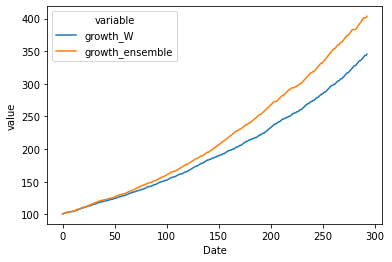

In [525]:
sns.lineplot(x = 'Date', y = 'value', hue = "variable", data = pd.melt(spot_earning, ['Date']))

### 5.2.

The growth rate/amount is higher if we use ensemble method than the best W. 